In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statistics
import scipy

In [9]:
dataset = pd.read_csv("general_data.csv")

In [11]:
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [13]:
dataset.shape

(4410, 24)

In [15]:
dataset.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [17]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [19]:
dataset.fillna(method = 'ffill', inplace = True)

In [21]:
dataset.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [24]:
df_categorical=pd.get_dummies(dataset[['Attrition']])
df_categorical

,Attrition_No,Attrition_Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
4405,1,0
4406,1,0
4407,1,0
4408,1,0


In [27]:
df_numerical=pd.concat([dataset,pd.get_dummies(dataset['Attrition'],prefix='Attrition')],axis=1)
df_numerical

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,17,8,1,10.0,5,3,0,2,1,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,15,8,0,10.0,2,3,0,2,1,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,20,8,0,5.0,4,4,1,2,1,0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,14,8,1,10.0,2,9,7,8,1,0


In [29]:
df_numerical.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.296805,-0.033137,NaN,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013006,0.038125,NaN,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016912,-0.040531,NaN,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.002902,-0.004456,NaN,-0.014254,-0.000577,-0.010191,0.004086,0.000256,0.008579,0.004729,-0.004729
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.011028,0.010973,NaN,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020922,0.004325,NaN,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,NaN,-0.002902,-0.011028,-0.020922,1.000000,0.030717,NaN,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030717,1.000000,NaN,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
pearsoncorr = df_numerical.corr(method='pearson')
pearsoncorr

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.296805,-0.033137,NaN,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013006,0.038125,NaN,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016912,-0.040531,NaN,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.002902,-0.004456,NaN,-0.014254,-0.000577,-0.010191,0.004086,0.000256,0.008579,0.004729,-0.004729
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.011028,0.010973,NaN,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020922,0.004325,NaN,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,NaN,-0.002902,-0.011028,-0.020922,1.000000,0.030717,NaN,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030717,1.000000,NaN,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
from scipy.stats import pearsonr
stats,p=pearsonr(df_numerical.Attrition_Yes,dataset.DistanceFromHome)
print(stats,p)
if p<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

-0.009730141010179674 0.5182860428050771
Accept Null Hypothesis


In [39]:
from scipy.stats import pearsonr
stats,p=pearsonr(df_numerical.Attrition_Yes,dataset.YearsAtCompany)
stats1,p2=pearsonr(df_numerical.Attrition_Yes,dataset.JobLevel)
print(stats,p)
if p<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")
print(stats1,p2)
if p2<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

-0.1343922139899772 3.1638831224877484e-19
Reject Null Hypothesis
-0.010289713287495042 0.49451717271828405
Accept Null Hypothesis


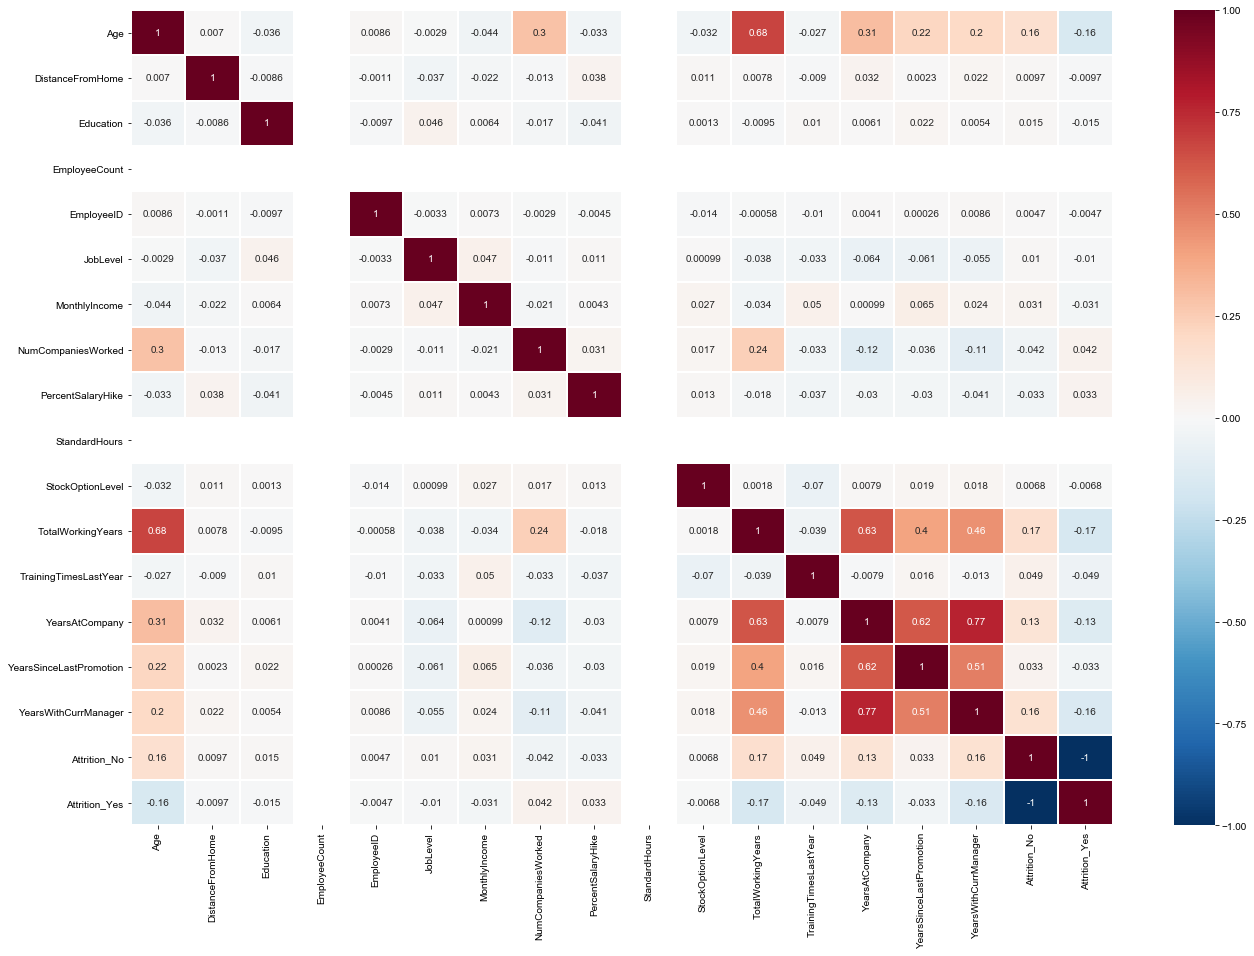

In [41]:
plt.figure(figsize=(22,15))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1.0)
sns.set(font_scale=3)